# Imports 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys, os
import numpy as np
import pandas as pd
import h5py, pickle
import math

# Load dataset

In [3]:
def load_dataset(data_path = '.'):
    train_dataset = h5py.File(data_path + '/train_catvnoncat.h5') #'./Data/train_catvnoncat.h5')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File(data_path + '/test_catvnoncat.h5')
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, -1))
    test_set_y_orig = test_set_y_orig.reshape((1, -1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
data_path = './Data'
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset(data_path)

In [5]:
train_set_x_orig.shape, train_set_y_orig.shape, test_set_x_orig.shape, test_set_y_orig.shape, classes

((209, 64, 64, 3),
 (1, 209),
 (50, 64, 64, 3),
 (1, 50),
 array([b'non-cat', b'cat'], dtype='|S7'))

In [6]:
train_set_x = train_set_x_orig.reshape((train_set_x_orig.shape[0], -1))
test_set_x = test_set_x_orig.reshape((test_set_x_orig.shape[0], -1))

In [7]:
train_set_x.shape, test_set_x.shape

((209, 12288), (50, 12288))

# Display

1

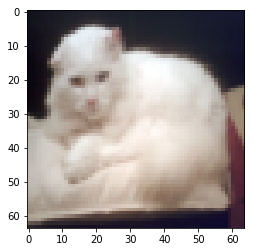

In [8]:
index = 13
plt.imshow(train_set_x_orig[index]);train_set_y_orig[0][index]

In [9]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

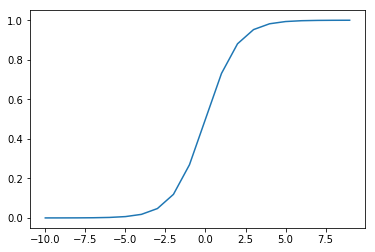

In [10]:
x = np.array(range(-10, 10))
plt.plot(x, sigmoid(x))

In [11]:
sigmoid(x)

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

In [12]:
train_set_x

array([[ 17,  31,  56, ...,   0,   0,   0],
       [196, 192, 190, ...,  82,  80,  81],
       [ 82,  71,  68, ..., 138, 141, 142],
       ...,
       [143, 155, 165, ...,  85, 107, 149],
       [ 22,  24,  23, ...,   4,   5,   0],
       [  8,  28,  53, ...,   0,   0,   0]], dtype=uint8)

In [13]:
train_set_x = train_set_x / 255.0
test_set_x = test_set_x / 255.0

In [14]:
train_set_x

array([[0.06666667, 0.12156863, 0.21960784, ..., 0.        , 0.        ,
        0.        ],
       [0.76862745, 0.75294118, 0.74509804, ..., 0.32156863, 0.31372549,
        0.31764706],
       [0.32156863, 0.27843137, 0.26666667, ..., 0.54117647, 0.55294118,
        0.55686275],
       ...,
       [0.56078431, 0.60784314, 0.64705882, ..., 0.33333333, 0.41960784,
        0.58431373],
       [0.08627451, 0.09411765, 0.09019608, ..., 0.01568627, 0.01960784,
        0.        ],
       [0.03137255, 0.10980392, 0.20784314, ..., 0.        , 0.        ,
        0.        ]])

In [15]:
m = train_set_x.shape[0]
n = train_set_x.shape[1]

In [16]:
class LRClassifier:
    def __init__(self, n, c):
        self.w = np.random.rand(n, c) / math.sqrt(n)
        self.n = n
        self.c = c
        
    def forward_prop(self, x):
        m ,n = x.shape
        if n != self.n:
            x = x.T
        m ,n = x.shape
        if n != self.n:
            print('shape mismatch!! m : {m} and n is {n} after transpose')
            return None
        z = np.matmul(x, self.w)
        #print(z)
        a = sigmoid(z)
        a[a == 1.0] = 0.9999
        return a
    
    def backprop(self, x, y, a, lr=1e-2):
        dw = (a - y).T
        #print(dw.shape, x.shape)
        dw1 = dw@x
        dw1 = dw1.T / x.shape[0]
        #print((dw1*lr))
        self.w = self.w - (dw1*lr)

In [17]:
lr_classifier = LRClassifier(n , 1)

In [18]:
a = lr_classifier.forward_prop(train_set_x)

In [19]:
a.shape, sum(a)

((209, 1), array([208.91596456]))

In [20]:
train_set_y_orig.shape, a.shape

((1, 209), (209, 1))

In [21]:
def accuracy(y ,a):
    thr_a = a.copy()
    thr_a[thr_a >= 0.5] = 1.0
    thr_a[thr_a < 0.5] = 0.0
    
    crr = sum(y == thr_a)
    #print(sum(thr_a))
    return crr / y.shape[0]    

In [22]:
dumy_y = np.array([[1.0, 1.0, 0.0, 1.0]]).T

In [23]:
dumy_a = np.array([[0.0, 0.0, 1.0, 1.0]]).T

In [24]:
accuracy(dumy_y, dumy_a)

array([0.25])

In [25]:
accuracy(train_set_y_orig.T, np.ones((train_set_y_orig.shape[1], 1)))

array([0.34449761])

In [26]:
accuracy(train_set_y_orig.T, a)

array([0.34449761])

In [27]:
def lr_loss_fn(y, a):
    t1 = np.log(a)
    t2 = np.log(1 - a)
    t = y.T@t1
    t = t + ((1 - y).T@t2)
    return -t / y.shape[0]

In [28]:
lr_loss_fn(train_set_y_orig.T, a)

array([[14.19492195]])

In [29]:
def eval_model(y, a):
    print('accuracy ', accuracy(y, a))
    print('loss value ', lr_loss_fn(y, a)[0])

In [30]:
eval_model(train_set_y_orig.T, a)

accuracy  [0.34449761]
loss value  [14.19492195]


In [31]:
lr_classifier.backprop(train_set_x, train_set_y_orig.T, a)

In [32]:
lr_classifier = LRClassifier(n , 1)
for i in range(1000):
    a = lr_classifier.forward_prop(train_set_x)
    lr_classifier.backprop(train_set_x, train_set_y_orig.T, a, lr=1e-1)
    if i%100 == 0:
        eval_model(train_set_y_orig.T, a)

accuracy  [0.34449761]
loss value  [14.0789843]
accuracy  [0.65550239]
loss value  [25.22464017]
accuracy  [0.65550239]
loss value  [17.38337912]
accuracy  [0.88038278]
loss value  [0.86124482]
accuracy  [0.73205742]
loss value  [4.60685533]
accuracy  [0.65550239]
loss value  [22.07571403]
accuracy  [0.97607656]
loss value  [0.058083]
accuracy  [0.99521531]
loss value  [0.00867103]
accuracy  [1.]
loss value  [0.00544667]
accuracy  [1.]
loss value  [0.00409056]


In [33]:
def save_model(lr_model, path):
    with open(path, 'wb') as f:
        pickle.dump(lr_model, f)

In [34]:
model_path = './model.pkl'

In [35]:
save_model(lr_classifier, model_path)

In [36]:
def load_model(path):
    with open(path, 'rb') as f:
        lr_model = pickle.load(f)
    return lr_model

In [37]:
lr_model = load_model(model_path)

In [38]:
lr_classifier = LRClassifier(n , 1)

In [39]:
def train(lr_model, train_set_x, train_set_y_orig, test_set_x, test_set_y_orig):
    for i in range(1000):
        a = lr_model.forward_prop(train_set_x)
        lr_model.backprop(train_set_x, train_set_y_orig.T, a, lr=1e-3)
        if i%100 == 0:
            a = lr_model.forward_prop(test_set_x)
            eval_model(test_set_y_orig.T, a)

In [43]:
train(lr_classifier, train_set_x, train_set_y_orig, test_set_x, test_set_y_orig)

accuracy  [0.74]
loss value  [0.62374974]
accuracy  [0.74]
loss value  [0.625043]
accuracy  [0.74]
loss value  [0.62639893]
accuracy  [0.74]
loss value  [0.62781184]
accuracy  [0.74]
loss value  [0.6292766]
accuracy  [0.74]
loss value  [0.63078853]
accuracy  [0.74]
loss value  [0.63234339]
accuracy  [0.74]
loss value  [0.63393732]
accuracy  [0.74]
loss value  [0.6355668]
accuracy  [0.74]
loss value  [0.63722859]


In [44]:
import pytest

In [46]:
#!pip install pytest-cov